In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
import numpy as np
from data_work import data_split
from data_work import processed
from data_work import analyse_dataset
from data_work import set_data
from sklearn.model_selection import train_test_split
df=pd.read_csv("/Users/mac/Dev/data/dta_IoT/new2test.csv")
#delete all null columns
id=[16,17,21,22,23,24]
col=df.columns
for idx in id:
    df=df.drop(col[idx],axis=1)
data=processed(df,"subcategory ")
names=["attack","category","subcategory "]
analyse_dataset(data,names)
data.to_csv("/Users/mac/Dev/source/article/FerderatedLearning/federated_learning/Federated_with_GAN/data_fine/lasted_data.csv")


thống kê nhãn attack:
1 6095
0 931
thống kê nhãn category:
3 1109
1 931
0 2994
2 1992
thống kê nhãn subcategory :
2 995
3 931
6 1000
7 1000
1 994
4 992
0 114
5 1000


In [3]:

traindata,test_data=train_test_split(data,test_size=0.4,random_state=42,stratify=data['subcategory '])
data = traindata.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
client_data,server_data=train_test_split(traindata,test_size=0.001,random_state=42)
client_data = client_data.reset_index(drop=True)
server_data = server_data.reset_index(drop=True)

In [4]:
analyse_dataset(test_data,names)

thống kê nhãn attack:
1 2439
0 372
thống kê nhãn category:
3 444
0 1198
1 372
2 797
thống kê nhãn subcategory :
2 398
1 398
3 372
6 400
4 397
5 400
7 400
0 46


[1, 0, 3, 0, 1, 2, 2, 1, 3, 6, 4, 5, 7, 0]

In [5]:
analyse_dataset(server_data,names)

thống kê nhãn attack:
0 2
1 3
thống kê nhãn category:
1 2
3 2
0 1
thống kê nhãn subcategory :
3 2
2 2
6 1


[0, 1, 1, 3, 0, 3, 2, 6]

In [6]:

testdata_list=set_data([test_data])[0]

#chia data thành list gồm 2 phàn tử [0] là X, [1] là y

len X 2811, len y 2811


# iid dataset setup 

In [7]:
trainloaders,testloaders=data_split(client_data,"subcategory ",8,0.1,IID=1)
#4 clients

prepairing IID dataset
len of client data :4210, len of each subdata : 526
client number 1 : train(474), val(52)
client number 2 : train(474), val(52)
client number 3 : train(474), val(52)
client number 4 : train(474), val(52)
client number 5 : train(474), val(52)
client number 6 : train(474), val(52)
client number 7 : train(474), val(52)
client number 8 : train(474), val(52)


In [8]:
BATCH_SIZE=10
NUM_CLIENTS=4
NUM_ROUNDS =3

In [9]:
from model import Net

In [10]:
trainlist=set_data(trainloaders)
testlist=set_data(testloaders)

len X 474, len y 474
len X 474, len y 474
len X 474, len y 474
len X 474, len y 474
len X 474, len y 474
len X 474, len y 474
len X 474, len y 474
len X 474, len y 474
len X 52, len y 52
len X 52, len y 52
len X 52, len y 52
len X 52, len y 52
len X 52, len y 52
len X 52, len y 52
len X 52, len y 52
len X 52, len y 52


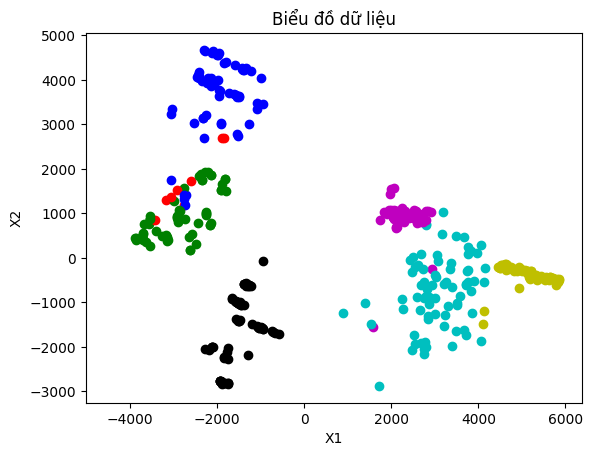

In [11]:
from sklearn.decomposition import PCA


# Khởi tạo PCA với số thành phần chính cần giữ lại là 2
pca = PCA(n_components=2)

# Thực hiện phân tích PCA trên dữ liệu
X_reduced = pca.fit_transform(trainlist[1][0])
import matplotlib.pyplot as plt


# Plot dữ liệu
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w'] # Màu sắc tương ứng với các nhãn
for i in range(len(X_reduced)):
    plt.scatter(X_reduced[i][0], X_reduced[i][1], color=colors[trainlist[1][1][i]])

# Đặt nhãn cho trục x và y
plt.xlabel('X1')
plt.ylabel('X2')

# Đặt tiêu đề cho đồ thị
plt.title('Biểu đồ dữ liệu')

# Hiển thị đồ thị
plt.show()

##Create model function

In [12]:
import torch
import torch.nn as nn

In [13]:
trainloaders,testloaders=data_split(client_data,"subcategory ",15,0.1,IID=0)

prepairing non IID dataset
len of client data :4200, len of each subdata : 280
client number 1 : train(252), val(28)
client number 2 : train(252), val(28)
client number 3 : train(252), val(28)
client number 4 : train(252), val(28)
client number 5 : train(252), val(28)
client number 6 : train(252), val(28)
client number 7 : train(252), val(28)
client number 8 : train(252), val(28)
client number 9 : train(252), val(28)
client number 10 : train(252), val(28)
client number 11 : train(252), val(28)
client number 12 : train(252), val(28)
client number 13 : train(252), val(28)
client number 14 : train(252), val(28)
client number 15 : train(252), val(28)


In [14]:
trainlist=set_data(trainloaders)
testlist=set_data(testloaders)

len X 252, len y 252
len X 252, len y 252
len X 252, len y 252
len X 252, len y 252
len X 252, len y 252
len X 252, len y 252
len X 252, len y 252
len X 252, len y 252
len X 252, len y 252
len X 252, len y 252
len X 252, len y 252
len X 252, len y 252
len X 252, len y 252
len X 252, len y 252
len X 252, len y 252
len X 28, len y 28
len X 28, len y 28
len X 28, len y 28
len X 28, len y 28
len X 28, len y 28
len X 28, len y 28
len X 28, len y 28
len X 28, len y 28
len X 28, len y 28
len X 28, len y 28
len X 28, len y 28
len X 28, len y 28
len X 28, len y 28
len X 28, len y 28
len X 28, len y 28


In [15]:
names=["subcategory "]
a=analyse_dataset(trainloaders[7],names)
print(a)

thống kê nhãn subcategory :
4 252
[4]


In [16]:
from CGan import CGAN

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2BD1B165-EC09-3F68-BCE4-8FE4E70CA7E2> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <F8622D92-25A9-3A61-A089-C917FDA36C1B> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/trans

##Client

In [17]:
class client():
    def __init__(self,cid,net):
        self.cid=cid 
        self.model=net
        self.trainset=net.dataset
        #self.testset=testset
        self.client_label=analyse_dataset(trainloaders[cid],["subcategory "])

    def get_parameter(self):
        return self.model.get_parameter()
    
    def fit(self, config ):
        # Read values from config
        server_round = config["server_round"]
        local_epochs = config["local_epochs"]
        #print command to know that the config of training process
        print(f"[Client {self.cid}, round {server_round}] fit, config: {config}")
        #num_examples_train = self.trainset.size[1]
        history=self.model.train()
        results = {
            "D_loss": history["D_loss"][-1],
            "G_loss": history["G_loss"][-1],
        }
        return results
    
    def Gen_fake_data(self,y):
        if isinstance(y, pd.DataFrame):
            y=torch.tensor(y.values)
        len=y.shape[0]
        z= torch.rand(len,self.model.z_dim)
        fdata=self.model.G(z,y)
        return fdata



In [18]:
class Args:
    def __init__(self,data_cid):
        self.epoch = 10
        self.batch_size = 5
        self.dataset = torch.tensor(trainloaders[data_cid].values)
        self.save_dir=" "
        self.result_dir=" "
        self.log_dir = 'logs/'
        self.gpu_mode = True
        self.gan_type = 'cGAN'
        self.z_dim = 10
        self.n_class = 8
        self.sample_num = self.n_class ** 2
        self.lrG=0.0001
        self.lrD=0.0001
        self.n_epochs=self.n_class
        self.n_classes=self.n_class
        self.noise_size=self.z_dim
        self.n_features=28

In [19]:
config = {
    "server_round": 3,
    "local_epochs": 10
    
}

In [20]:
def client_fn(cid: str):  
    """Create a Flower client representing a single organization."""
    # Load model
    args=Args(cid)
    print(cid)
    net=CGAN(args)
    # Create a  single Flower client representing a single organization
    return client(cid, net)

In [21]:
print(len(test_data))

2811


In [22]:
te=torch.tensor(server_data.values)
X_te=te[:,1:]
y_te=te[:,:1]
print(len(X_te))
y_te=y_te.squeeze().tolist()
y_te=torch.tensor(y_te)
mul=Net(0.00)
mul.Cross_validation(X_te,y_te,2,0.0003)
_,accuracy=mul.evaluate(testdata_list[0],testdata_list[1])
print(f"total accuracy : {accuracy}")

5
length of trainset 2, length of testset3
Accuracy for fold 1 : 0.0
length of trainset 3, length of testset2
Accuracy for fold 2 : 1.0
total accuracy : 0.31590181430096054


##Server

In [23]:
import random
class server():
    def __init__(self):
        self.server_model=Net(0.00)
        self.trainset=torch.tensor(server_data.values)
        self.testset=testdata_list
        self.clients=[]
        n_clients=15
        for i in range(n_clients):
            client=client_fn(i)
            self.clients.append(client)

    
    #def fit_round():
    def simulation(self,rounds):
        
        for round in range(rounds):
            total_fake=[]
            for i in range(len(self.clients)):
                #kết hợp data sever và xáo trộn
                data=torch.cat((self.clients[i].model.dataset, self.trainset), dim=0)
                indices = list(range(data.size(0)))
                random.shuffle(indices)
                shuffled_data = data[indices, :]
                self.clients[i].model.dataset= shuffled_data
                #D_parameters,G_parameters=client.get_parameter()
                config = {
                            "server_round": round,
                            "local_epochs": 5
                        }
                results=self.clients[i].fit(config)
                print(results)
                
                y=self.clients[i].client_label*100

                #tạo data giả
                y=torch.tensor(y, dtype=torch.long)
                data_fake=self.clients[i].Gen_fake_data(y)
                data_fake=torch.cat((y.unsqueeze(1), data_fake), dim=1)
                total_fake.append(data_fake)
            round_data = torch.empty(1, 29)
            for fake in total_fake:
                fake=fake.detach()
                round_data=torch.cat((round_data,fake), dim=0)
            print(f"number of synthetic data : {len(round_data)}")
            
            X=round_data[:,1:]
            y=round_data[:,:1]
            #print(y)
            y=y.squeeze().tolist()
            y=torch.tensor(y)
            #self.server_model.Cross_validation(X,y,5,0.003)
            self.server_model.Cross_validation(X,y,5,0.003)
            _,accuracy=self.server_model.evaluate(self.testset[0],self.testset[1])
            print(f"round{round} accuracy:{accuracy}")


            

            


In [24]:
fed=server()

0
---------- Networks architecture -------------
Gen(
  (label_emb): Embedding(8, 8)
  (model): Sequential(
    (0): Linear(in_features=18, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): BatchNorm1d(256, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Linear(in_features=256, out_features=512, bias=True)
    (6): BatchNorm1d(512, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Linear(in_features=512, out_features=1028, bias=True)
    (9): BatchNorm1d(1028, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2)
    (11): Linear(in_features=1028, out_features=28, bias=True)
    (12): BatchNorm1d(28, eps=0.8, momentum=0.1, affine=True, track_running_stats=True)
    (13): LeakyReLU(negative_slope=0.2)
  )
)
Total number of parameter

In [25]:
fed.simulation(5)

[Client 0, round 0] fit, config: {'server_round': 0, 'local_epochs': 5}
training start!!
Epoch: [ 1] [  50/  50] D_loss: 0.06182293, G_loss: 0.57622457
Epoch: [ 2] [  50/  50] D_loss: 0.02834306, G_loss: 0.73241872
Epoch: [ 3] [  50/  50] D_loss: 0.00462499, G_loss: 0.89759827
Epoch: [ 4] [  50/  50] D_loss: 0.00054106, G_loss: 0.96454871
Epoch: [ 5] [  50/  50] D_loss: 0.00009831, G_loss: 0.98805648
Epoch: [ 6] [  50/  50] D_loss: 0.00000924, G_loss: 0.99118108
Epoch: [ 7] [  50/  50] D_loss: 0.00000352, G_loss: 0.99829614
Epoch: [ 8] [  50/  50] D_loss: 0.00000012, G_loss: 0.99921811
Epoch: [ 9] [  50/  50] D_loss: 0.00000001, G_loss: 0.99959087
Epoch: [10] [  50/  50] D_loss: 0.20000008, G_loss: 0.99966812
Avg one epoch time: 1.44, total 10 epochs time: 14.39
Training finish!
{'D_loss': 0.2000000774860382, 'G_loss': 0.9996681213378906}
[Client 1, round 0] fit, config: {'server_round': 0, 'local_epochs': 5}
training start!!
Epoch: [ 1] [  50/  50] D_loss: 0.01230287, G_loss: 0.801848

KeyboardInterrupt: 

#Train models with IID and non-IID data  